In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
Tesla = data.DataReader("TSLA", data_source="yahoo", start = "2010-06-28", end = "2019-06-01")
Tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001


In [15]:
Tesla.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-20,206.000000,195.250000,202.800003,205.360001,20526200,205.360001
2019-05-21,207.399994,196.039993,197.759995,205.080002,18003900,205.080002
2019-05-22,203.940002,191.779999,199.100006,192.729996,18685200,192.729996
2019-05-23,199.470001,186.220001,194.339996,195.490005,26547100,195.490005
2019-05-24,199.979996,188.750000,199.830002,190.630005,14119900,190.630005


In [3]:
Tesla.shape

(2242, 6)

In [4]:
Tesla_train = Tesla.iloc[:2100, :]
Tesla_train.shape

(2100, 6)

In [5]:
Tesla_test = Tesla.iloc[2100:, :]
Tesla_test.shape

(142, 6)

In [6]:
training_set = Tesla.iloc[:2100, 2:3].values
training_set

array([[ 19.        ],
       [ 25.79000092],
       [ 25.        ],
       ...,
       [317.22000122],
       [308.25      ],
       [337.47000122]])

In [7]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 2099):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [8]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


# Fitting the RNN to the Training set using Keras Callbacks
es = EarlyStopping(monitor='loss', mode='min', min_delta=1e-10, patience=5, verbose=1)
rlr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=5, verbose=1)
mcp = ModelCheckpoint(filepath='weights.h5', monitor='loss', verbose=1, save_best_only=True, save_weights_only=True)
tb = TensorBoard('logs')
history = regressor.fit(X_train, y_train, shuffle=True, epochs = 100, callbacks=[es, rlr,mcp, tb],batch_size = 32)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


C:\Users\Christy\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


Instructions for updating:
Use tf.cast instead.
Epoch 1/100
2039/2039 [==============================] - 24s 12ms/step - loss: 0.0320

Epoch 00001: loss improved from inf to 0.03204, saving model to weights.h5
Epoch 2/100
2039/2039 [==============================] - 19s 9ms/step - loss: 0.0057

Epoch 00002: loss improved from 0.03204 to 0.00568, saving model to weights.h5
Epoch 3/100
2039/2039 [==============================] - 19s 9ms/step - loss: 0.0050

Epoch 00003: loss improved from 0.00568 to 0.00504, saving model to weights.h5
Epoch 4/100
2039/2039 [==============================] - 19s 9ms/step - loss: 0.0047

Epoch 00004: loss improved from 0.00504 to 0.00472, saving model to weights.h5
Epoch 5/100
2039/2039 [==============================] - 19s 9ms/step - loss: 0.0044

Epoch 00005: loss improved from 0.00472 to 0.00441, saving model to weights.h5
Epoch 6/100
2039/2039 [==============================] - 19s 9ms/step - loss: 0.0041

Epoch 00006: loss improved from 0.00441 to 0

2039/2039 [==============================] - 19s 9ms/step - loss: 0.0017

Epoch 00052: loss did not improve from 0.00149
Epoch 53/100
2039/2039 [==============================] - 19s 9ms/step - loss: 0.0016

Epoch 00053: loss did not improve from 0.00149
Epoch 54/100
2039/2039 [==============================] - 19s 9ms/step - loss: 0.0016

Epoch 00054: loss did not improve from 0.00149
Epoch 55/100
2039/2039 [==============================] - 19s 9ms/step - loss: 0.0016

Epoch 00055: loss did not improve from 0.00149
Epoch 56/100
2039/2039 [==============================] - 19s 9ms/step - loss: 0.0016

Epoch 00056: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 00056: loss did not improve from 0.00149
Epoch 00056: early stopping


In [9]:
# Part 3 - Making the predictions and visualising the results

# Getting the real recent stock price until May 2019
real_stock_price = Tesla_test.iloc[:, 2:3].values

In [10]:
# Getting the predicted stock price until May 2019
Tesla_total = pd.concat((Tesla_train['Close'], Tesla_test['Close']), axis = 0)
inputs = Tesla_total[len(Tesla_total) - len(Tesla_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 202):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

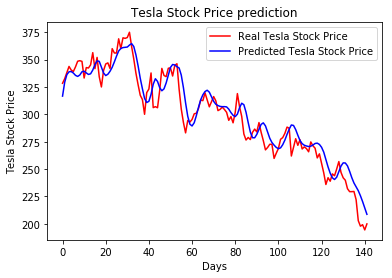

In [11]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Tesla Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Tesla Stock Price')
plt.title('Tesla Stock Price prediction')
plt.xlabel('Days')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()

In [12]:
#Evaluating the RNN
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
rmse

12.343664092368371

In [13]:
min_val=min(real_stock_price)
max_val=max(real_stock_price)
print ("relative error: ", rmse/(max_val-min_val))

relative error:  [0.06832538]


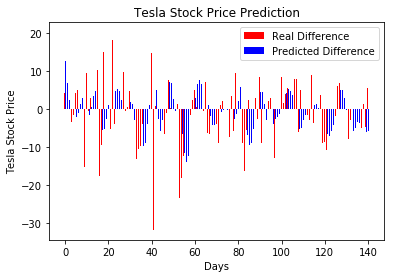

In [14]:
# Visualising the results
 
shift_pred= predicted_stock_price[:-1]
shift_pred = np.append(0, np.reshape(shift_pred, len(shift_pred)))
shift_real = real_stock_price[:-1]
shift_real = np.append(0, np.reshape(shift_real, len(shift_real)))
 
dif_pred = np.add(np.reshape(predicted_stock_price, len(predicted_stock_price)), - shift_pred)[1:]
dif_real = np.add(np.reshape(real_stock_price, len(real_stock_price)), - shift_real)[1:]
 
fig, ax = plt.subplots()
ind = np.arange(dif_real.size)
real_bar = ax.bar(ind-0.15, dif_real, width=0.3, color = 'red', label = 'Real Difference')
pred_bar = ax.bar(ind+0.15, dif_pred, width=0.3, color = 'blue', label = 'Predicted Difference')
ax.set_title('Tesla Stock Price Prediction')
ax.set_xlabel('Days')
ax.set_ylabel('Tesla Stock Price')
ax.legend()
plt.show()